In [28]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
lst_data = glob('./data/*')
var_data = ['cust_demo', 'prod_buy', 'service_use', 'prod_cat', 'partner', 'lpay']
for name, file in zip(var_data, lst_data):
    globals()[name] = pd.read_csv(file)

C:\Users\KwonYujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
for name in var_data:
    print(name, ': ', globals()[name].shape)

cust_demo :  (29913, 4)
prod_buy :  (4381743, 10)
service_use :  (248304, 9)
prod_cat :  (1933, 4)
partner :  (8808, 4)
lpay :  (353184, 7)


In [13]:
prod_buy.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct'],
      dtype='object')

In [14]:
prod_buy['de_dt'] = pd.to_datetime(prod_buy['de_dt'], format='%Y%m%d')
service_use['de_dt'] = pd.to_datetime(service_use['de_dt'], format='%Y%m%d')
lpay['de_dt'] = pd.to_datetime(lpay['de_dt'], format='%Y%m%d')

In [20]:
prod_buy['de_month'] = prod_buy.de_dt.dt.month_name()
service_use['de_month'] = service_use.de_dt.dt.month_name()
lpay['de_month'] = lpay.de_dt.dt.month_name()

prod_buy['de_wday'] = prod_buy.de_dt.dt.day_name()
service_use['de_wday'] = service_use.de_dt.dt.day_name()
lpay['de_wday'] = lpay.de_dt.dt.day_name()

In [56]:
prod_buy['de_month'] = prod_buy['de_month'].astype('category')
service_use['de_month'] = service_use['de_month'].astype('category')
lpay['de_month'] = lpay['de_month'].astype('category')

cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
prod_buy['de_month'] = prod_buy['de_month'].cat.reorder_categories(cats)
service_use['de_month'] = service_use['de_month'].cat.reorder_categories(cats)
lpay['de_month'] = lpay['de_month'].cat.reorder_categories(cats)

In [49]:
prod_buy['de_wday'] = prod_buy['de_wday'].astype('category')
service_use['de_wday'] = service_use['de_wday'].astype('category')
lpay['de_wday'] = lpay['de_wday'].astype('category')

prod_buy['de_wday'] = prod_buy['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
service_use['de_wday'] = service_use['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
lpay['de_wday'] = lpay['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

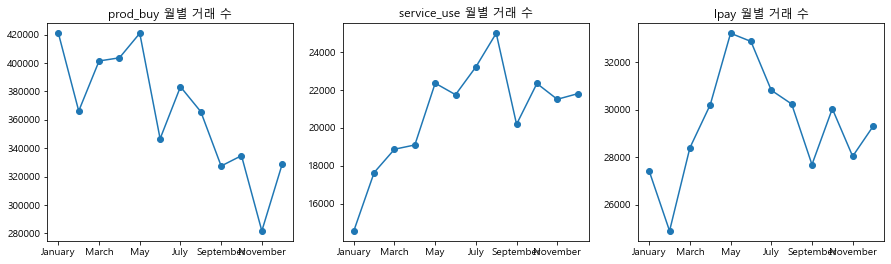

In [59]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
prod_buy.de_month.value_counts(sort=False).plot(ax=axes[0], marker='o')
axes[0].set_title('prod_buy 월별 거래 수')
service_use.de_month.value_counts(sort=False).plot(ax=axes[1], marker='o')
axes[1].set_title('service_use 월별 거래 수')
lpay.de_month.value_counts(sort=False).plot(ax=axes[2], marker='o')
axes[2].set_title('lpay 월별 거래 수')
plt.show()

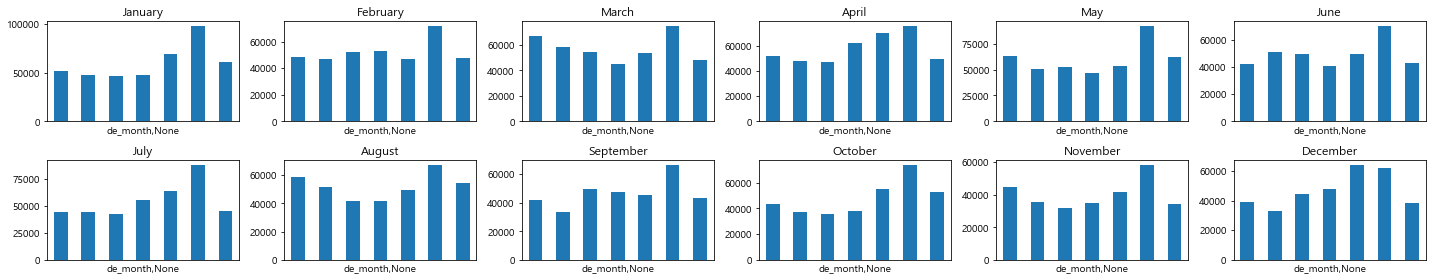

In [64]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = prod_buy.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

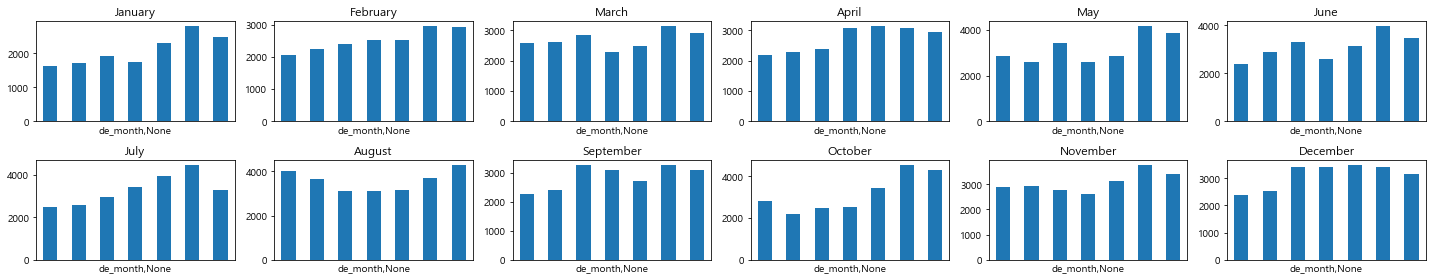

In [65]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = service_use.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

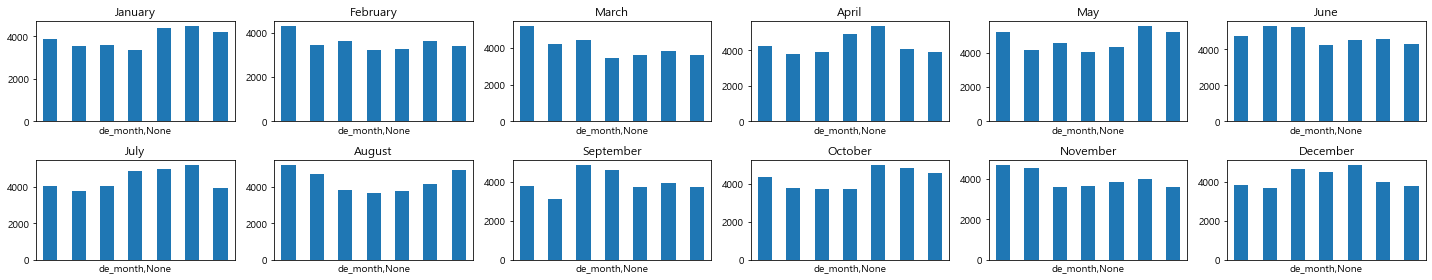

In [66]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = lpay.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

lpay 가입 유저와 아닌 유저 차이?

In [70]:
prod_cust = set(prod_buy.cust.unique())
service_cust = set(service_use.cust.unique())
lpay_cust = set(lpay.cust.unique())

In [72]:
only_prod = list(prod_cust - lpay_cust)
only_service = list(service_cust - lpay_cust)
only_lpay = list(lpay_cust - prod_cust - service_cust)

In [77]:
df_prod_only = prod_buy.query('cust in @only_prod')
df_service_only = service_use.query('cust in @only_service')
df_prod_lpay = prod_buy.query('cust in @lpay_cust')
df_service_lpay = service_use.query('cust in @lpay_cust')

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


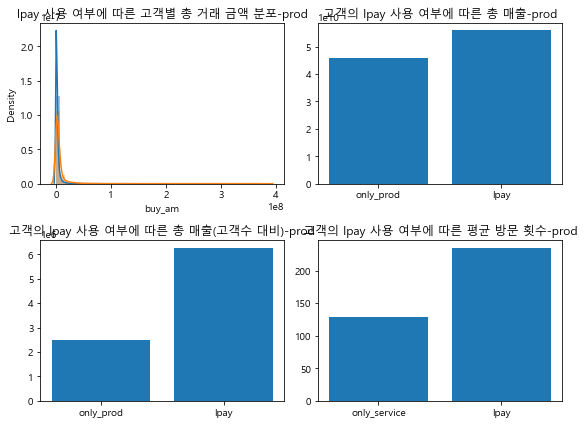

In [111]:
fig, axes = plt.subplots(2,2, figsize=(8,6))
sns.distplot(df_prod_only.groupby('cust').buy_am.sum(), ax=axes[0,0])
sns.distplot(df_prod_lpay.groupby('cust').buy_am.sum(), ax=axes[0,0])
axes[0,0].set_title('lpay 사용 여부에 따른 고객별 총 거래 금액 분포-prod')
axes[0,1].bar(['only_prod', 'lpay'], [df_prod_only.groupby('cust').buy_am.sum().sum(), df_prod_lpay.groupby('cust').buy_am.sum().sum()])
axes[0,1].set_title('고객의 lpay 사용 여부에 따른 총 매출-prod')
axes[1,0].bar(['only_prod', 'lpay'], [df_prod_only.groupby('cust').buy_am.sum().sum()/len(only_prod), df_prod_lpay.groupby('cust').buy_am.sum().sum()/len(lpay_cust)])
axes[1,0].set_title('고객의 lpay 사용 여부에 따른 총 매출(고객수 대비)-prod')
axes[1,1].bar(['only_service', 'lpay'], [df_prod_only.groupby('cust').cust.count().mean(), df_prod_lpay.groupby('cust').cust.count().mean()])
axes[1,1].set_title('고객의 lpay 사용 여부에 따른 평균 방문 횟수-prod')
plt.tight_layout()
plt.show()

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


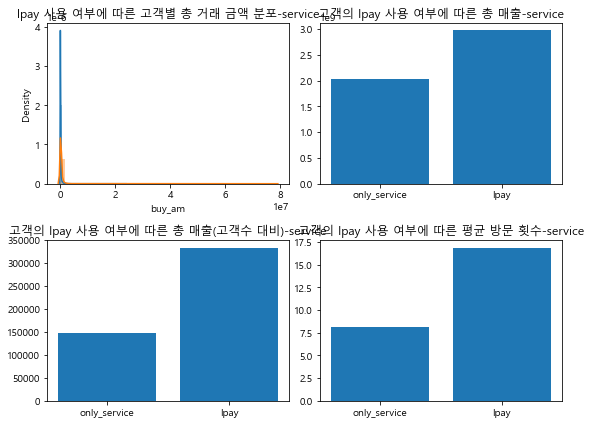

In [109]:
fig, axes = plt.subplots(2,2, figsize=(8,6))
sns.distplot(df_service_only.groupby('cust').buy_am.sum(), ax=axes[0,0])
sns.distplot(df_service_lpay.groupby('cust').buy_am.sum(), ax=axes[0,0])
axes[0,0].set_title('lpay 사용 여부에 따른 고객별 총 거래 금액 분포-service')
axes[0,1].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').buy_am.sum().sum(), df_service_lpay.groupby('cust').buy_am.sum().sum()])
axes[0,1].set_title('고객의 lpay 사용 여부에 따른 총 매출-service')
axes[1,0].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').buy_am.sum().sum()/len(only_service), df_service_lpay.groupby('cust').buy_am.sum().sum()/len(lpay_cust)])
axes[1,0].set_title('고객의 lpay 사용 여부에 따른 총 매출(고객수 대비)-service')
axes[1,1].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').cust.count().mean(), df_service_lpay.groupby('cust').cust.count().mean()])
axes[1,1].set_title('고객의 lpay 사용 여부에 따른 평균 방문 횟수-service')
plt.tight_layout()
plt.show()

$\rightarrow$ 확실히 많이 팔아주고 많이 방문하는 사람들은 lpay 가입자다!

lpay, service, product에 다 있는 사람은 어떤 사람이냐? (lpay에 있는 사람 대부분이 이럼)

유통사 확인

In [69]:
prod_buy.cop_c.unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06'], dtype=object)

롯데쇼핑	대형종합소매업
롯데하이마트	전자부문 대형종합소매업
롯데시네마	영화 및 엔터테인먼트업
롯데컬처웍스	영화 및 엔터테인먼트업
씨에스유통	음식료품위주 종합소매업
한국에스티엘	가방 및 기타 가죽 제품소매업
에프알엘코리아	섬유, 직물, 의복 및 악세서리 소매업
더시네마오브코리아	사진 촬영 및 처리업
롯데지에프알	의류제조업
롯데홈쇼핑	통신판매업
코리아세븐	음식료품위주 종합소매업
바이더웨이	음식료품위주 종합소매업
롯데상사	무역업
한국후지필름	그 외 기타 화학제품 제조업
무인양품	생활용품, 의류, 가구, 식품 제조판매업
롯데닷컴	통신판매업
시네마통상	음식료품 위주 종합소매업
시네마푸드	음식료품 위주 종합소매업
롯데역사	대형종합소매업

롯데 백화점, 롯데 마트, 롯데 슈퍼, 코리아 세븐, 롯데하이마트, 롯데홈쇼핑, 롯데e-커머스, 롯데롭스, 롯데멤버스, 롯데컬쳐웍스, 에프엘알코리아